In [1]:
import numpy as np
import os
from skimage.feature import hog
import joblib
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [11]:
# train_dir = r'/content/drive/MyDrive/YourFolderName/'
train_dir = r'ocr_data/train/'
labels_list = [i for i in os.listdir(train_dir)]
pathimg = [os.listdir(train_dir + i) for i in labels_list]

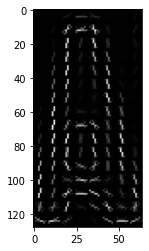

In [12]:
# Visualize HOG for letter A
im_test =  cv2.imread('ocr_data/train/A/roi107644.jpg',0)
_,hog_img= hog(im_test,orientations=9,pixels_per_cell=(8,8), cells_per_block=(1, 1),visualize=True)
plt.imshow(hog_img,cmap='gray')
# cv2.imwrite('AHog.jpg',hog_img)

In [13]:
# extract the hog for each image and store it in a list with its 
# corresponding label
features = []
labels = []
for i,j in enumerate(zip(pathimg,labels_list)):
  imgs,label = j
  for img in imgs:
      img = cv2.imread(train_dir+label+'/'+img)
      img_res=cv2.resize(img,(64,128),interpolation=cv2.INTER_AREA)
      img_gray= cv2.cvtColor(img_res,cv2.COLOR_BGR2GRAY)
      hog_img= hog(img_gray,orientations=9,pixels_per_cell=(8,8), cells_per_block=(1, 1))
      features.append(hog_img)
      labels.append(label)

In [14]:
print(len(pd.DataFrame(np.array(features))))
print(len(pd.DataFrame(np.array(labels))))

1027
1027


In [15]:
df = pd.DataFrame(np.array(features))
df['target'] = labels
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,target
0,0.401754,0.299450,0.574131,0.299450,0.574131,0.000000,0.000000,0.000000,0.000000,0.327018,0.382063,0.488925,0.488925,0.488925,0.103412,0.092495,0.000000,0.103412,0.060884,0.000000,0.054880,0.690688,0.690688,0.178233,0.086102,0.000000,0.000000,0.026147,0.000000,0.023569,0.706275,0.706275,0.033332,0.000000,0.000000,0.000000,0.041698,0.030448,0.000000,0.278415,...,0.439605,0.000000,0.000000,0.239038,0.020430,0.097549,0.020430,0.009137,0.347505,0.520150,0.520150,0.520150,0.098058,0.000000,0.000000,0.000000,0.563780,0.563780,0.563780,0.191937,0.000000,0.039016,0.079001,0.498055,0.498055,0.498055,0.498055,0.000000,0.000000,0.000000,0.472343,0.497944,0.497944,0.497944,0.181787,0.000000,0.000000,0.000000,0.000000,4
1,0.334902,0.106981,0.473623,0.562923,0.562923,0.000000,0.135321,0.000000,0.000000,0.408448,0.000000,0.166805,0.408448,0.408448,0.408448,0.408448,0.371518,0.000000,0.109517,0.000000,0.299967,0.578753,0.578753,0.476917,0.025813,0.000000,0.000000,0.120547,0.000000,0.000000,0.697002,0.697002,0.094194,0.070509,0.000000,0.000000,0.057512,0.000000,0.000000,0.705618,...,0.461790,0.507635,0.507635,0.155819,0.000000,0.000000,0.000000,0.000000,0.345272,0.654411,0.654411,0.000000,0.042882,0.000000,0.000000,0.000000,0.576819,0.576819,0.576819,0.000000,0.000000,0.082287,0.390011,0.313764,0.609374,0.609374,0.000000,0.000000,0.000000,0.000000,0.496710,0.496710,0.496710,0.496710,0.114527,0.000000,0.000000,0.000000,0.000000,4
2,0.179432,0.000000,0.253755,0.200611,0.798622,0.200611,0.380632,0.200611,0.000000,0.406807,0.000000,0.406807,0.406807,0.406807,0.406807,0.406807,0.083964,0.000000,0.049351,0.055177,0.104690,0.700836,0.700836,0.000000,0.034897,0.000000,0.000000,0.119174,0.000000,0.053711,0.564786,0.564786,0.564786,0.161134,0.000000,0.000000,0.070271,0.000000,0.050081,0.702172,...,0.396903,0.396903,0.396903,0.160605,0.000000,0.000000,0.000000,0.000000,0.493509,0.493509,0.493509,0.493509,0.035319,0.000000,0.000000,0.000000,0.541162,0.541162,0.506287,0.381765,0.104728,0.048287,0.260344,0.502864,0.502864,0.502864,0.397469,0.115282,0.000000,0.000000,0.101358,0.534020,0.534020,0.534020,0.366326,0.000000,0.000000,0.000000,0.000000,4
3,0.500000,0.500000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.394873,0.000000,0.528899,0.528899,0.528899,0.000000,0.069804,0.000000,0.000000,0.088879,0.000000,0.282810,0.673858,0.673858,0.000000,0.062847,0.000000,0.000000,0.047218,0.026396,0.066776,0.703353,0.703353,0.000000,0.050082,0.026396,0.000000,0.044926,0.000000,0.031768,0.142399,...,0.000000,0.000000,0.000000,0.509256,0.502572,0.509256,0.374296,0.000000,0.000000,0.000000,0.000000,0.297725,0.466486,0.000000,0.078052,0.000000,0.000000,0.351385,0.466486,0.466486,0.466486,0.174412,0.000000,0.000000,0.000000,0.510921,0.510921,0.510921,0.393733,0.177295,0.406479,0.406479,0.406479,0.406479,0.406479,0.000000,0.000000,0.092995,0.406479,4
4,0.427534,0.000000,0.323914,0.427534,0.427534,0.427534,0.404893,0.000000,0.000000,0.424278,0.411908,0.065128,0.102977,0.424278,0.424278,0.424278,0.308931,0.000000,0.413553,0.203448,0.413553,0.413553,0.413553,0.413553,0.321679,0.000000,0.000000,0.394944,0.397680,0.397680,0.397680,0.397680,0.397680,0.000000,0.222415,0.061687,0.288978,0.060277,0.509279,0.509279,...,0.388015,0.388015,0.156452,0.390878,0.000000,0.014057,0.022226,0.019880,0.151769,0.564940,0.564940,0.429859,0.020085,0.000000,0.000000,0.000000,0.577234,0.577234,0.577234,0.000000,0.000000,0.057229,0.499181,0.499181,0.499181,0.499181,0.000000,0.000000,0.000000,0.000000,0.559539,0.559539,0.497494,0.334461,0.116728,0.000000,0.000000,0.029001,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [16]:
df['target'].unique()

array(['4', '1', '5', '8', '6', '2', '3', '9', '7', '0', 'J', 'E', 'F',
       'D', 'H', 'C', 'B', 'G', 'A', 'M', 'Q', 'T', 'K', 'S', 'N', 'P',
       'R', 'L', 'U', 'W', 'Y', 'X'], dtype=object)

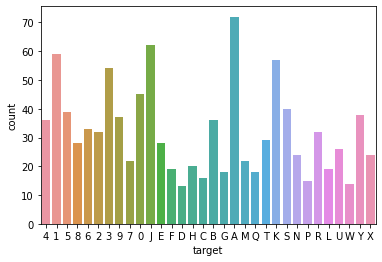

In [17]:
# df.target.value_counts()
sns.countplot(x='target', data=df)

#Training

In [20]:
x = np.array(df.iloc[:,:-1])
y = np.array(df['target'])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.20,
                                                    random_state=42)

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
sm_x,sm_y=sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

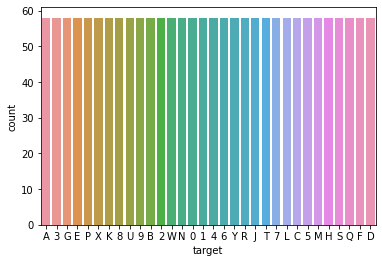

In [23]:
bal_df = pd.DataFrame(sm_x)
bal_df['target']=pd.DataFrame(sm_y)
sns.countplot(x='target', data=bal_df)

In [24]:
bal_df['target'].value_counts()

3    58
1    58
L    58
G    58
E    58
T    58
8    58
Y    58
H    58
P    58
S    58
M    58
U    58
6    58
Q    58
W    58
7    58
F    58
A    58
9    58
K    58
0    58
5    58
D    58
J    58
B    58
C    58
X    58
R    58
4    58
2    58
N    58
Name: target, dtype: int64

In [25]:
lreg = LogisticRegression()
clf=lreg.fit(sm_x, sm_y)
y_pred = clf.predict(x_test)
print('Accuracy {:.2f}'.format(clf.score(x_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

Accuracy 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00        11
           A       1.00      1.00      1.00        14
           B       1.00      1.00      1.00         5
           C       1.00      1.00      1.00         6
           D       1.00      1.00      1.00         4
           E       1.00      1.00      1.00         5
           F       1.00      1.00      1.00         4
           G       1.00      1.00      1.00         6
           H 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
# save trained model
joblib.dump(clf, r'ocr_data/models/hog_lreg_model_3.pkl')

['/content/drive/MyDrive/ocr_data/models/hog_lreg_model_3.pkl']

In [28]:
from google.colab.patches import cv2_imshow

#Testing

CAL667TC


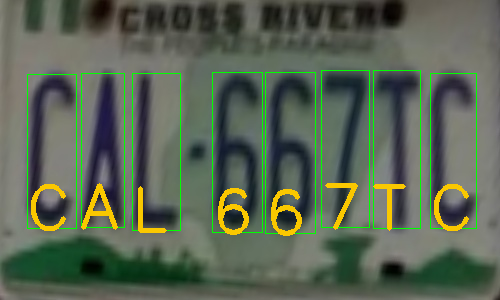

In [32]:
# Load the classifier
clf = joblib.load("ocr_data/models/hog_lreg_model_3.pkl")

# Read the input image
im = cv2.imread("ocr_data/licenseplates/licplate4.jpg")

# Convert to grayscale
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Threshold the image in order to find contours
ret, im_th = cv2.threshold(im_gray, 120, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Find contours in the image
ctrs,hier = cv2.findContours(im_th, cv2.RETR_TREE,
                                 cv2.CHAIN_APPROX_SIMPLE)

bboxes=[cv2.boundingRect(c) for c in ctrs]
sorted_bboxes = sorted(bboxes,key=lambda b:b[0])

# For each rectangular region, calculate HOG features and predict
# the digit using our logistic regression model.
plate_char=[]
for num,i_bboxes in enumerate(sorted_bboxes):
    [x,y,w,h]=i_bboxes
    if h>100 and w < 100:
    # Make the rectangular region around the digit
        cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)
        roi=im_gray[y:y+h,x:x+w]
        # Resize the image
        roi = cv2.resize(roi, (64, 128), interpolation=cv2.INTER_AREA)
        # Calculate the HOG features
        # use the same parameters used for training
        roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(8, 8),
                         cells_per_block=(1, 1))
        nbr = clf.predict(np.array([roi_hog_fd]))
        
        cv2.putText(im, str((nbr[0])), (x,y+h),cv2.FONT_HERSHEY_SIMPLEX,
                    2, (0, 200, 250), 3)
        plate_char.append(str(nbr[0]))

print(''.join(plate_char))
                     
cv2_imshow(im)